In [1]:
import pandas as pd
import numpy as np
from itertools import product
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", probability=True),
    "NaiveBayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Bagging": BaggingClassifier(n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42)
}

In [3]:
df_all_1key = pd.read_csv('features_ecb/features_ecb_1800/features_ecb_1800_1key_csv/features_all.csv')
df_all_1key

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0712.txt.enc,txt_ecb,7.953168,128.467799,5343.516712,73.099362,-0.013672,-1.173812,421101,10.332958,...,21,6,15,8,21,18,11,10,18,DES
1,file0702.txt.enc,txt_ecb,7.957637,126.868197,5484.109329,74.054772,0.026720,-1.208248,498956,10.299057,...,17,21,22,31,16,10,9,20,18,DES
2,file0474.txt.enc,txt_ecb,7.948121,128.093462,5524.150565,74.324630,-0.035580,-1.201301,469780,10.399258,...,20,22,17,22,10,19,15,21,16,DES
3,file0464.txt.enc,txt_ecb,7.923841,128.062500,5325.930816,72.978975,0.010116,-1.176344,305348,10.296777,...,7,16,7,18,9,13,12,11,16,DES
4,file0416.txt.enc,txt_ecb,7.969860,127.728509,5409.310950,73.548018,-0.002922,-1.190564,785092,10.333740,...,30,21,27,28,28,42,32,33,25,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,file0296.html.enc,html_ecb,7.975020,127.501356,5322.031452,72.952255,-0.010045,-1.177811,785458,10.319319,...,18,26,27,35,35,22,26,36,34,AES
10796,file0205.html.enc,html_ecb,7.940540,129.548953,5344.901544,73.108834,-0.021992,-1.177478,344545,10.299472,...,18,12,11,11,12,13,19,7,8,AES
10797,file0063.html.enc,html_ecb,7.960428,128.951366,5487.055375,74.074661,-0.017170,-1.198135,499521,10.167482,...,15,26,18,24,20,24,21,21,23,AES
10798,file0062.html.enc,html_ecb,7.971135,128.986693,5298.546025,72.791112,-0.021510,-1.178905,697075,10.209198,...,24,18,25,23,33,18,18,28,31,AES


In [4]:
df_all_3keys = pd.read_csv('features_ecb/features_ecb_1800/features_ecb_1800_3keys_csv/features_all.csv')
df_all_3keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0712.txt.enc,txt_ecb,7.949006,129.442951,5328.238125,72.994781,-0.034261,-1.162242,413759,10.242484,...,15,13,15,16,13,16,13,24,13,DES
1,file0702.txt.enc,txt_ecb,7.958095,126.245961,5468.592777,73.949934,-0.005645,-1.203137,491501,10.221827,...,14,18,17,15,14,17,16,12,19,DES
2,file0474.txt.enc,txt_ecb,7.951170,128.292127,5327.139109,72.987253,-0.032209,-1.163913,464727,10.343179,...,18,11,26,10,9,12,14,22,21,DES
3,file0464.txt.enc,txt_ecb,7.931572,125.267361,5323.743101,72.963985,0.047010,-1.160175,295710,10.132970,...,5,9,10,15,11,10,12,12,12,DES
4,file0416.txt.enc,txt_ecb,7.976906,128.645947,5416.431366,73.596409,-0.023341,-1.177501,773151,10.254852,...,26,30,33,31,27,34,41,23,30,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,file0296.html.enc,html_ecb,7.975020,127.368357,5443.285002,73.778622,0.021762,-1.206143,775205,10.251746,...,20,42,27,32,32,24,30,28,24,AES
10796,file0205.html.enc,html_ecb,7.933916,128.554187,5477.788936,74.012086,-0.019388,-1.192969,345176,10.308899,...,11,14,9,8,13,8,27,11,13,AES
10797,file0063.html.enc,html_ecb,7.965546,127.687707,5483.780991,74.052556,-0.008165,-1.200562,510261,10.276204,...,18,30,20,19,23,15,23,17,19,AES
10798,file0062.html.enc,html_ecb,7.973147,126.390550,5475.274504,73.995098,0.025759,-1.197544,699448,10.226560,...,21,26,24,29,33,17,23,33,18,AES


In [5]:
df_all_6keys = pd.read_csv('features_ecb/features_ecb_1800/features_ecb_1800_6keys_csv/features_all.csv')
df_all_6keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0712.txt.enc,txt_ecb,7.954571,127.711714,5570.495238,74.635750,-0.000505,-1.214700,411065,10.209084,...,18,14,16,17,14,15,12,22,22,DES
1,file0702.txt.enc,txt_ecb,7.956312,129.129677,5457.885820,73.877506,-0.028154,-1.210878,488986,10.195641,...,17,27,19,21,11,21,23,17,22,DES
2,file0474.txt.enc,txt_ecb,7.952469,126.718462,5451.282385,73.832800,0.018871,-1.186578,455505,10.240040,...,21,19,21,21,15,13,17,15,21,DES
3,file0464.txt.enc,txt_ecb,7.934643,126.921528,5488.975787,74.087622,0.007566,-1.198594,305680,10.302373,...,11,12,11,10,8,13,9,10,14,DES
4,file0416.txt.enc,txt_ecb,7.972640,127.630441,5492.408176,74.110783,-0.010423,-1.213082,773125,10.254680,...,23,36,29,25,27,24,29,16,24,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,file0296.html.enc,html_ecb,7.974892,127.717055,5532.366933,74.379883,-0.003293,-1.210410,766113,10.191450,...,23,36,35,23,32,36,31,27,32,AES
10796,file0205.html.enc,html_ecb,7.941012,129.273399,5409.375376,73.548456,-0.003337,-1.187548,340998,10.246320,...,11,9,9,12,14,10,14,12,20,AES
10797,file0063.html.enc,html_ecb,7.951605,127.036424,5450.371604,73.826632,0.003938,-1.201273,509002,10.263519,...,21,13,10,27,11,19,24,13,24,AES
10798,file0062.html.enc,html_ecb,7.974435,125.989982,5403.388506,73.507745,0.032749,-1.182400,705043,10.267381,...,13,23,34,17,28,25,25,36,23,AES


In [6]:
encoder = LabelEncoder()
df_all_1key['algorithm'] = encoder.fit_transform(df_all_1key['algorithm'])
print(encoder.classes_)

X = df_all_1key.drop(columns=["algorithm", "file_name", "format"])
y = df_all_1key["algorithm"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

['AES' 'ARC4' 'DES' 'DES3' 'NONE']


In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_list = []
class_results = {model_name: [] for model_name in models}

for model_name, model in models.items():
    acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
    log_losses, auc_scores = [], []
    
    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]  # dla pandas.DataFrame
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        if y_pred_proba is not None:
            log_losses.append(log_loss(y_test, y_pred_proba))
            auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))
        else:
            log_losses.append(None)
            auc_scores.append(None)

        class_precision = precision_score(y_test, y_pred, average=None)
        class_recall = recall_score(y_test, y_pred, average=None)
        class_f1 = f1_score(y_test, y_pred, average=None)

        for i, class_label in enumerate(np.unique(y)):
            class_results[model_name].append({
                "Class": class_label,
                "Precision": class_precision[i],
                "Recall": class_recall[i],
                "F1-Score": class_f1[i]
            })

    results_list.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_scores),
        "Accuracy Std": np.std(acc_scores),
        "Precision Mean": np.mean(precision_scores),
        "Precision Std": np.std(precision_scores),
        "Recall Mean": np.mean(recall_scores),
        "Recall Std": np.std(recall_scores),
        "F1-Score Mean": np.mean(f1_scores),
        "F1-Score Std": np.std(f1_scores),
        "Log Loss Mean": np.mean([x for x in log_losses if x is not None]) if any(log_losses) else None,
        "AUC Mean": np.mean([x for x in auc_scores if x is not None]) if any(auc_scores) else None
    })

df_results = pd.DataFrame(results_list)
df_class_results = pd.DataFrame([
    {"Model": model, **result} for model, results in class_results.items() for result in results
])

df_results.style.format("{:.4f}"), df_class_results.style.format("{:.4f}")

(<pandas.io.formats.style.Styler at 0x137b52fa0>,
 <pandas.io.formats.style.Styler at 0x137852b50>)

In [8]:
df_results

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std,Log Loss Mean,AUC Mean
0,RandomForest,0.774352,0.009141,0.781688,0.009567,0.774352,0.009141,0.772294,0.009375,0.659611,0.950993
1,SVM,0.398611,0.013762,0.417310,0.016937,0.398611,0.013762,0.349466,0.014723,1.210199,0.729230
2,NaiveBayes,0.271667,0.011783,0.271230,0.014097,0.271667,0.011783,0.214336,0.011753,25.272162,0.583340
3,KNN,0.556852,0.008164,0.574477,0.008051,0.556852,0.008164,0.548917,0.006146,6.544839,0.797592
4,Bagging,0.762037,0.011631,0.767195,0.011407,0.762037,0.011631,0.760678,0.011427,0.564988,0.948375
5,AdaBoost,0.499537,0.021282,0.540645,0.027879,0.499537,0.021282,0.455286,0.028818,1.584859,0.789491


In [3]:
import pandas as pd
import io

csv_data = """
RandomForest,0.774352,0.009141,0.781688,0.009567,0.774352,0.009141,0.772294,0.009375,0.659611,0.950993
SVM,0.398611,0.013762,0.417310,0.016937,0.398611,0.013762,0.349466,0.014723,1.210199,0.729230
NaiveBayes,0.271667,0.011783,0.271230,0.014097,0.271667,0.011783,0.214336,0.011753,25.272162,0.583340
KNN,0.556852,0.008164,0.574477,0.008051,0.556852,0.008164,0.548917,0.006146,6.544839,0.797592
Bagging,0.762037,0.011631,0.767195,0.011407,0.762037,0.011631,0.760678,0.011427,0.564988,0.948375
AdaBoost,0.499537,0.021282,0.540645,0.027879,0.499537,0.021282,0.455286,0.028818,1.584859,0.789491
"""

# Definicje polskich nazw kolumn
column_names = [
    "Model",
    "Średnia dokładność",
    "Odch. std (dokł.)",
    "Średnia precyzja",
    "Odch. std (prec.)",
    "Średnia czułość",
    "Odch. std (czuł.)",
    "Średni F1 Score",
    "Odch. std (F1)",
    "Średnia strata log.",
    "Średni AUC"
]

# Wczytanie danych CSV do DataFrame
# Używamy io.StringIO, aby traktować string csv_data jak plik
df = pd.read_csv(io.StringIO(csv_data), header=None)

# Przypisanie polskich nazw kolumn
df.columns = column_names

# Wyświetlenie DataFrame (opcjonalnie)
df

,Model,Średnia dokładność,Odch. std (dokł.),Średnia precyzja,Odch. std (prec.),Średnia czułość,Odch. std (czuł.),Średni F1 Score,Odch. std (F1),Średnia strata log.,Średni AUC
0,RandomForest,0.774352,0.009141,0.781688,0.009567,0.774352,0.009141,0.772294,0.009375,0.659611,0.950993
1,SVM,0.398611,0.013762,0.417310,0.016937,0.398611,0.013762,0.349466,0.014723,1.210199,0.729230
2,NaiveBayes,0.271667,0.011783,0.271230,0.014097,0.271667,0.011783,0.214336,0.011753,25.272162,0.583340
3,KNN,0.556852,0.008164,0.574477,0.008051,0.556852,0.008164,0.548917,0.006146,6.544839,0.797592
4,Bagging,0.762037,0.011631,0.767195,0.011407,0.762037,0.011631,0.760678,0.011427,0.564988,0.948375
5,AdaBoost,0.499537,0.021282,0.540645,0.027879,0.499537,0.021282,0.455286,0.028818,1.584859,0.789491


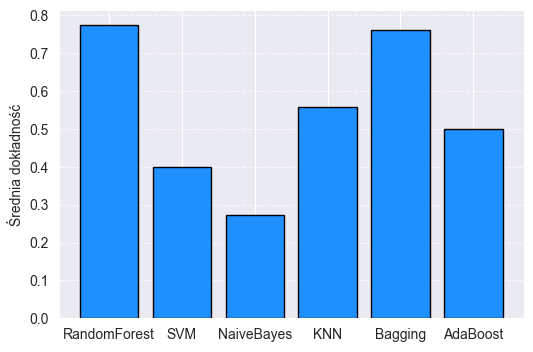

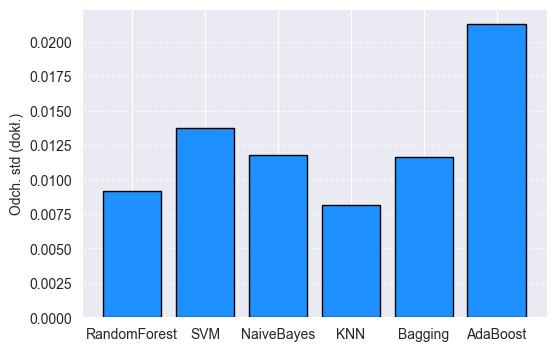

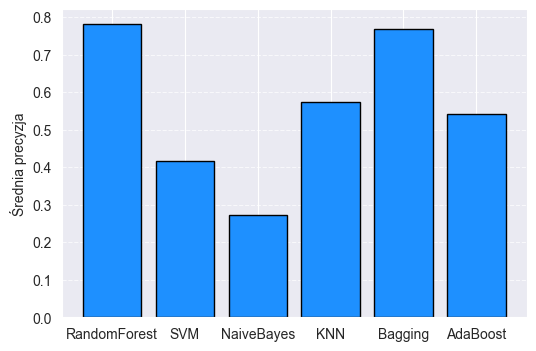

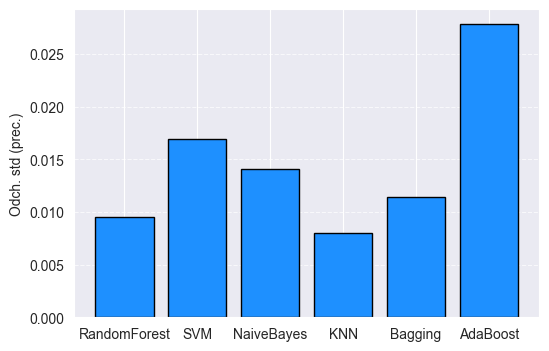

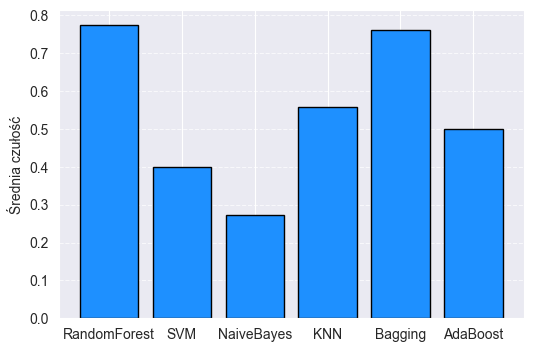

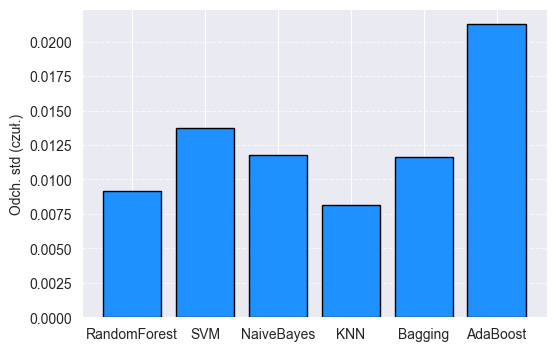

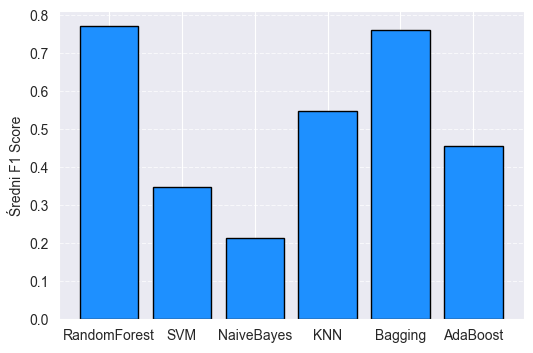

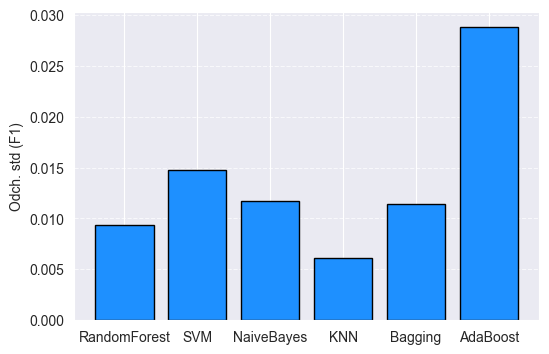

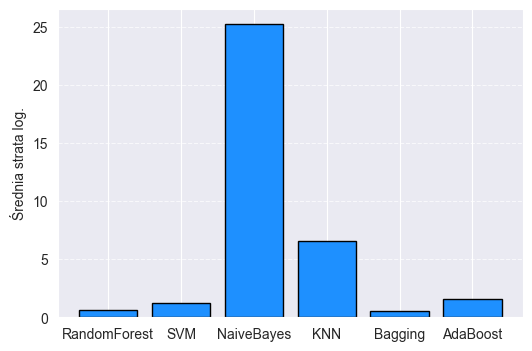

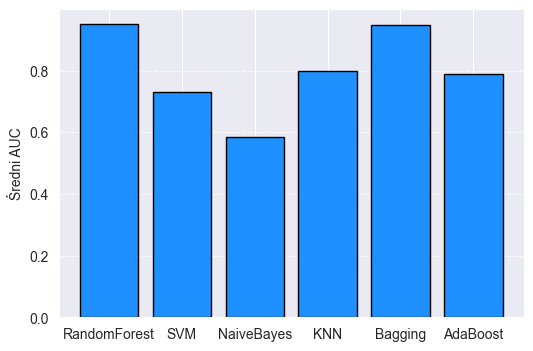

In [4]:
import matplotlib.pyplot as plt

for metric in df.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df["Model"], df[metric], color="dodgerblue", edgecolor="black")
    #plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

In [12]:
df_class_results_1key = pd.read_csv('training_1800_ecb/df_class_results_1800_ecb_1key.csv')
df_class_results_1key

,0,RandomForest,0.1,0.641631,0.679545,0.660044
0,1,RandomForest,1,0.658759,0.930412,0.771368
1,2,RandomForest,2,0.789017,0.634884,0.703608
2,3,RandomForest,3,0.802857,0.621681,0.700748
3,4,RandomForest,4,1.000000,1.000000,1.000000
4,5,RandomForest,0,0.610442,0.723810,0.662309
...,...,...,...,...,...,...
144,145,AdaBoost,0,0.449721,0.353070,0.395577
145,146,AdaBoost,1,0.379576,0.873614,0.529214
146,147,AdaBoost,2,0.592857,0.192130,0.290210
147,148,AdaBoost,3,0.526042,0.249383,0.338358


In [13]:
encoder = LabelEncoder()
df_all_3keys['algorithm'] = encoder.fit_transform(df_all_3keys['algorithm'])
print(encoder.classes_)

X = df_all_3keys.drop(columns=["algorithm", "file_name", "format"])
y = df_all_3keys["algorithm"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_list = []
class_results = {model_name: [] for model_name in models}

for model_name, model in models.items():
    acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
    log_losses, auc_scores = [], []

    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]  # dla pandas.DataFrame
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        if y_pred_proba is not None:
            log_losses.append(log_loss(y_test, y_pred_proba))
            auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))
        else:
            log_losses.append(None)
            auc_scores.append(None)

        class_precision = precision_score(y_test, y_pred, average=None)
        class_recall = recall_score(y_test, y_pred, average=None)
        class_f1 = f1_score(y_test, y_pred, average=None)

        for i, class_label in enumerate(np.unique(y)):
            class_results[model_name].append({
                "Class": class_label,
                "Precision": class_precision[i],
                "Recall": class_recall[i],
                "F1-Score": class_f1[i]
            })

    results_list.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_scores),
        "Accuracy Std": np.std(acc_scores),
        "Precision Mean": np.mean(precision_scores),
        "Precision Std": np.std(precision_scores),
        "Recall Mean": np.mean(recall_scores),
        "Recall Std": np.std(recall_scores),
        "F1-Score Mean": np.mean(f1_scores),
        "F1-Score Std": np.std(f1_scores),
        "Log Loss Mean": np.mean([x for x in log_losses if x is not None]) if any(log_losses) else None,
        "AUC Mean": np.mean([x for x in auc_scores if x is not None]) if any(auc_scores) else None
    })

df_results = pd.DataFrame(results_list)
df_class_results = pd.DataFrame([
    {"Model": model, **result} for model, results in class_results.items() for result in results
])

df_results.style.format("{:.4f}"), df_class_results.style.format("{:.4f}")

['AES' 'ARC4' 'DES' 'DES3' 'NONE']


(<pandas.io.formats.style.Styler at 0x143096490>,
 <pandas.io.formats.style.Styler at 0x1432b5ca0>)

In [14]:
df_results

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std,Log Loss Mean,AUC Mean
0,RandomForest,0.721389,0.008960,0.727907,0.008733,0.721389,0.008960,0.720671,0.008928,0.770185,0.923426
1,SVM,0.404074,0.015403,0.419215,0.017329,0.404074,0.015403,0.351500,0.012767,1.205963,0.736899
2,NaiveBayes,0.271204,0.010408,0.271737,0.015753,0.271204,0.010408,0.214207,0.011180,25.256832,0.586167
3,KNN,0.540000,0.011496,0.558684,0.011753,0.540000,0.011496,0.535665,0.011611,6.819465,0.787380
4,Bagging,0.710833,0.005727,0.717900,0.006209,0.710833,0.005727,0.710509,0.005743,0.671634,0.926225
5,AdaBoost,0.437593,0.038653,0.519925,0.018911,0.437593,0.038653,0.383503,0.060418,1.585176,0.759946


In [5]:
import pandas as pd
import io

csv_data = """
RandomForest,0.721389,0.008960,0.727907,0.008733,0.721389,0.008960,0.720671,0.008928,0.770185,0.923426
SVM,0.404074,0.015403,0.419215,0.017329,0.404074,0.015403,0.351500,0.012767,1.205963,0.736899
NaiveBayes,0.271204,0.010408,0.271737,0.015753,0.271204,0.010408,0.214207,0.011180,25.256832,0.586167
KNN,0.540000,0.011496,0.558684,0.011753,0.540000,0.011496,0.535665,0.011611,6.819465,0.787380
Bagging,0.710833,0.005727,0.717900,0.006209,0.710833,0.005727,0.710509,0.005743,0.671634,0.926225
AdaBoost,0.437593,0.038653,0.519925,0.018911,0.437593,0.038653,0.383503,0.060418,1.585176,0.759946
"""

# Definicje polskich nazw kolumn
column_names = [
    "Model",
    "Średnia dokładność",
    "Odch. std (dokł.)",
    "Średnia precyzja",
    "Odch. std (prec.)",
    "Średnia czułość",
    "Odch. std (czuł.)",
    "Średni F1 Score",
    "Odch. std (F1)",
    "Średnia strata log.",
    "Średni AUC"
]

# Wczytanie danych CSV do DataFrame
# Używamy io.StringIO, aby traktować string csv_data jak plik
df = pd.read_csv(io.StringIO(csv_data), header=None)

# Przypisanie polskich nazw kolumn
df.columns = column_names

# Wyświetlenie DataFrame
df

,Model,Średnia dokładność,Odch. std (dokł.),Średnia precyzja,Odch. std (prec.),Średnia czułość,Odch. std (czuł.),Średni F1 Score,Odch. std (F1),Średnia strata log.,Średni AUC
0,RandomForest,0.721389,0.008960,0.727907,0.008733,0.721389,0.008960,0.720671,0.008928,0.770185,0.923426
1,SVM,0.404074,0.015403,0.419215,0.017329,0.404074,0.015403,0.351500,0.012767,1.205963,0.736899
2,NaiveBayes,0.271204,0.010408,0.271737,0.015753,0.271204,0.010408,0.214207,0.011180,25.256832,0.586167
3,KNN,0.540000,0.011496,0.558684,0.011753,0.540000,0.011496,0.535665,0.011611,6.819465,0.787380
4,Bagging,0.710833,0.005727,0.717900,0.006209,0.710833,0.005727,0.710509,0.005743,0.671634,0.926225
5,AdaBoost,0.437593,0.038653,0.519925,0.018911,0.437593,0.038653,0.383503,0.060418,1.585176,0.759946


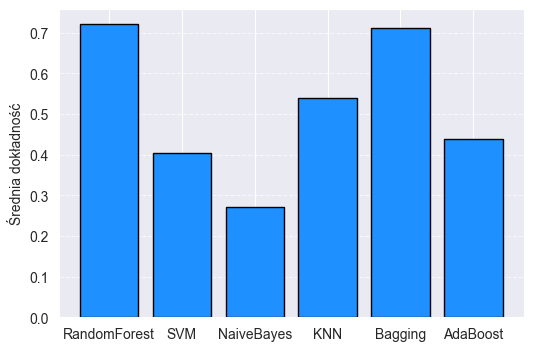

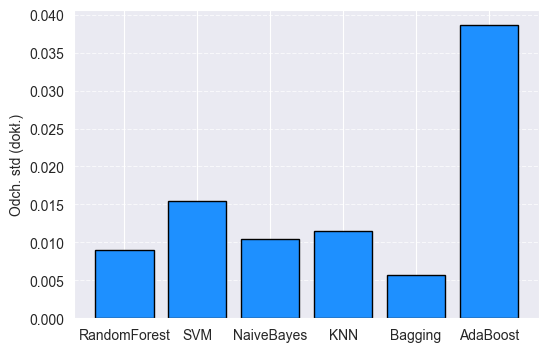

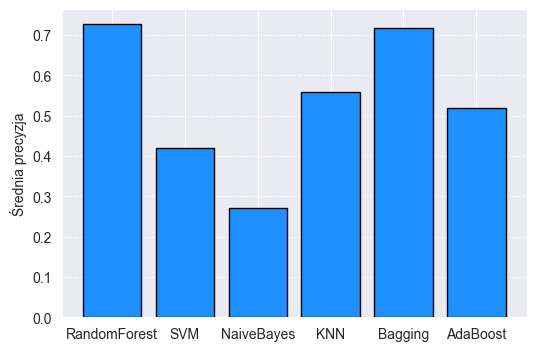

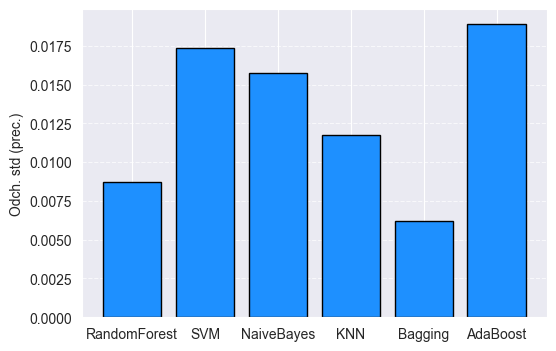

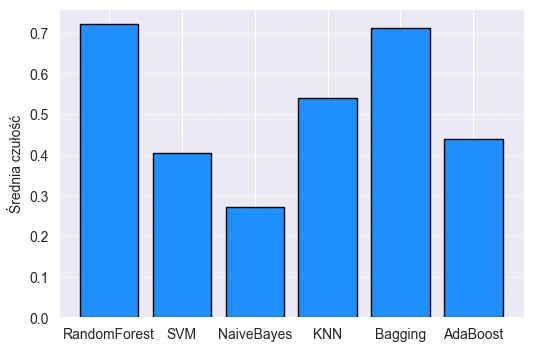

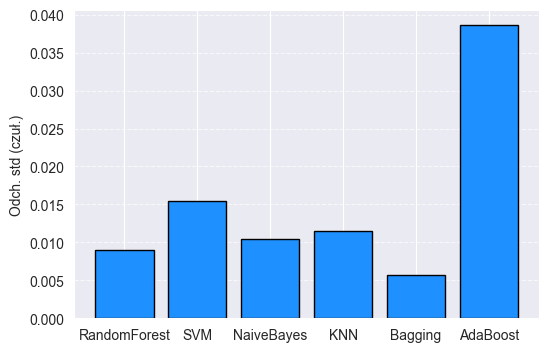

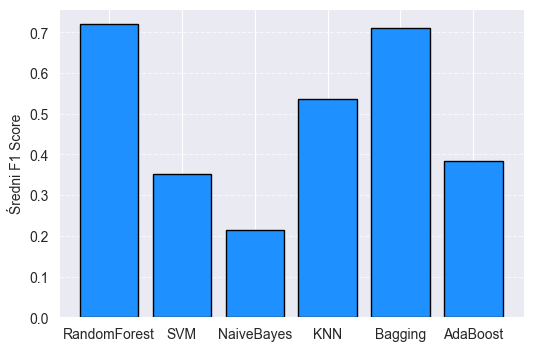

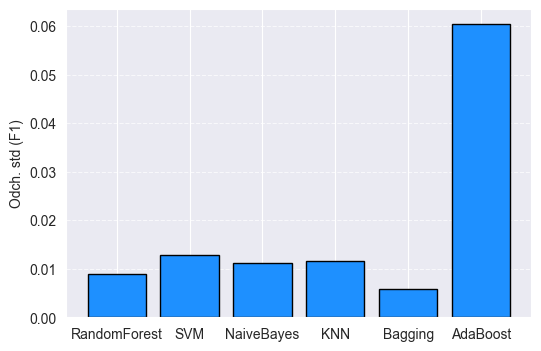

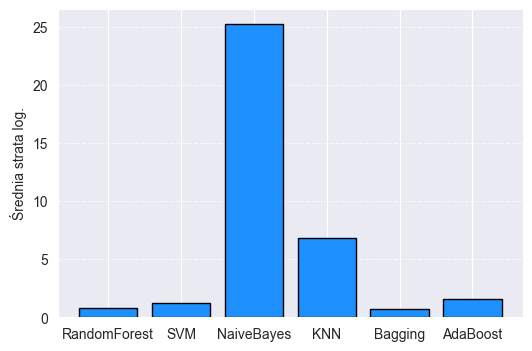

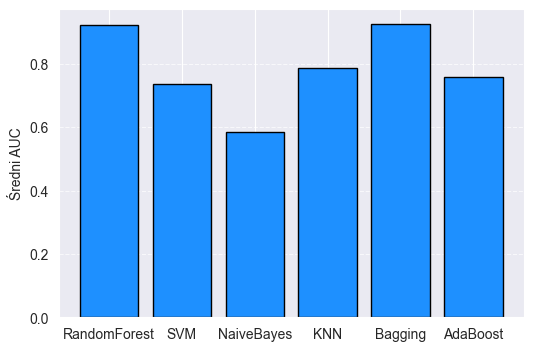

In [6]:
import matplotlib.pyplot as plt

for metric in df.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df["Model"], df[metric], color="dodgerblue", edgecolor="black")
    #plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

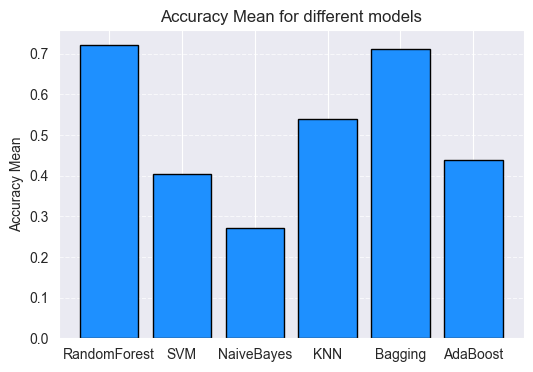

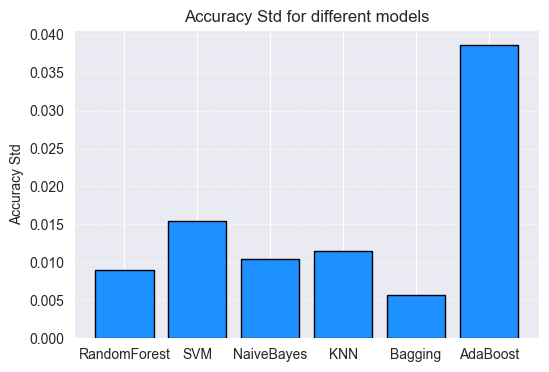

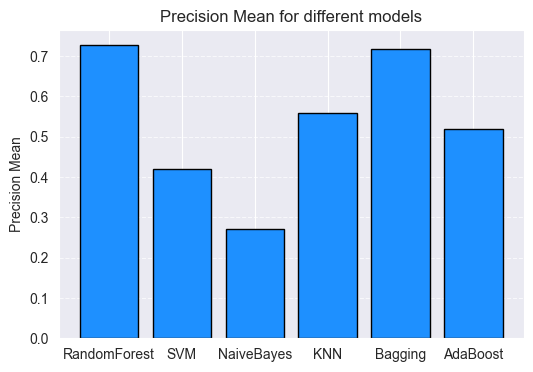

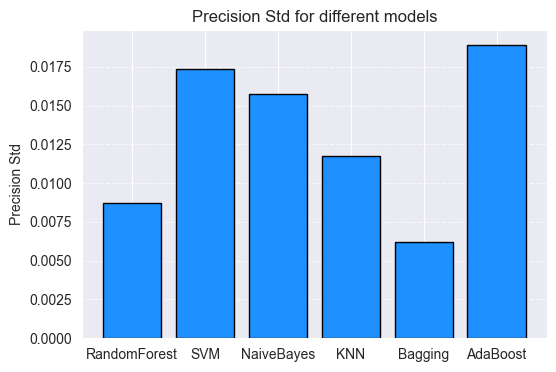

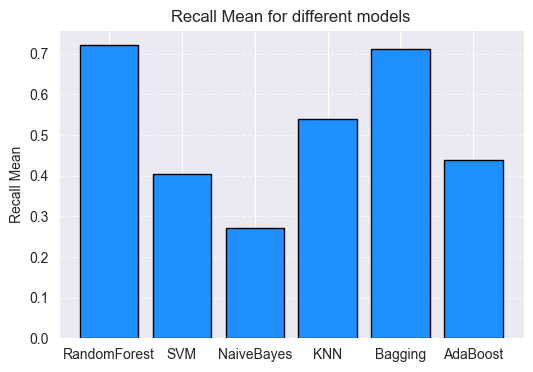

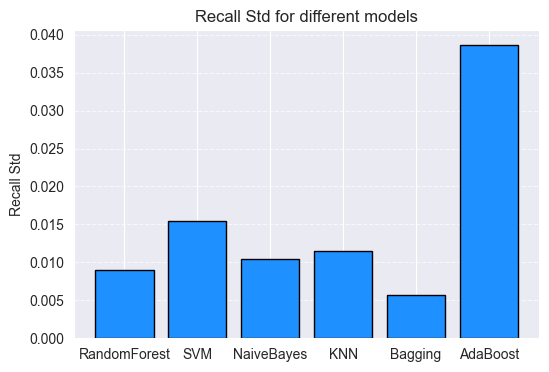

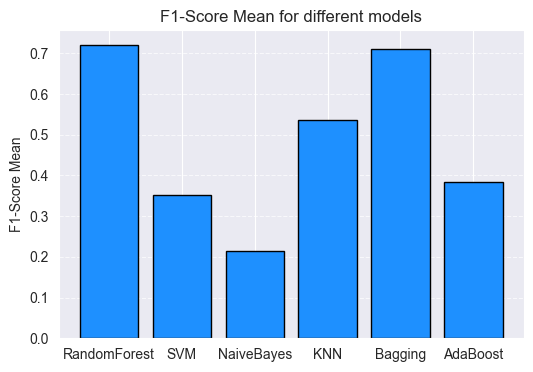

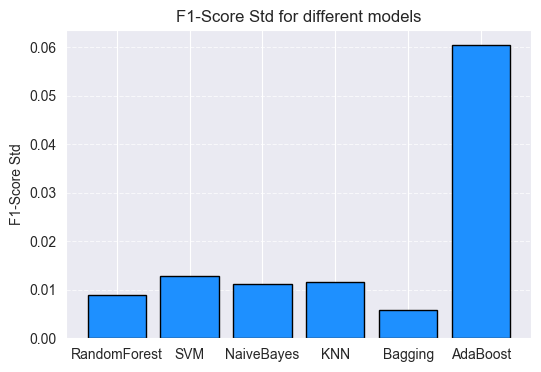

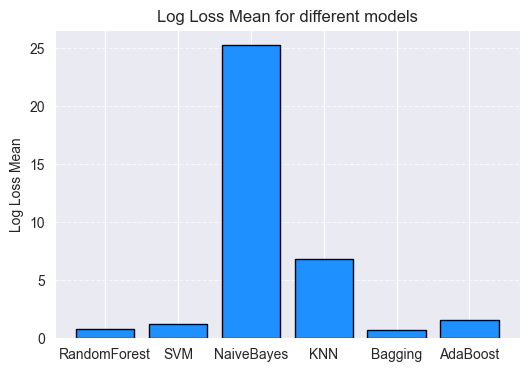

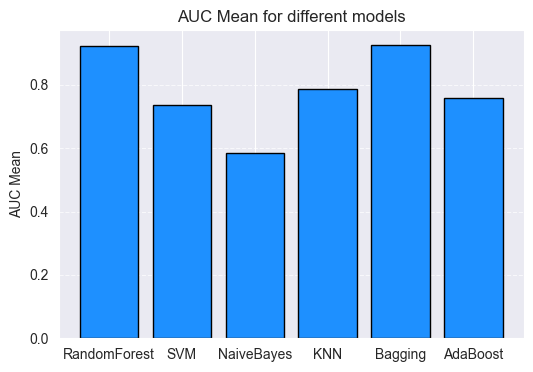

Best model: RandomForest with F1-Score = 0.7203564304533765
Worst model: NaiveBayes with F1-Score = 0.21385549302225396


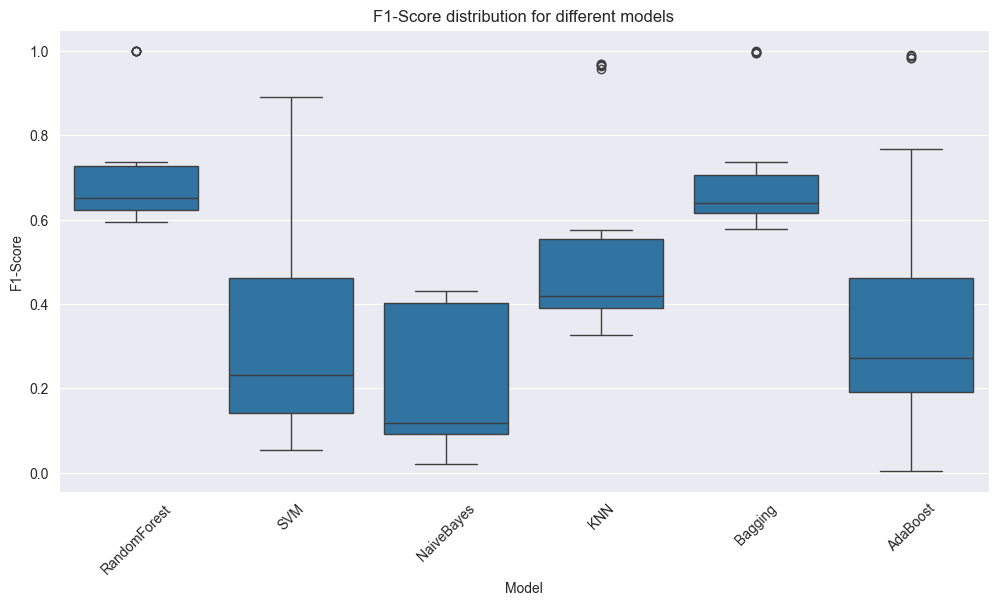

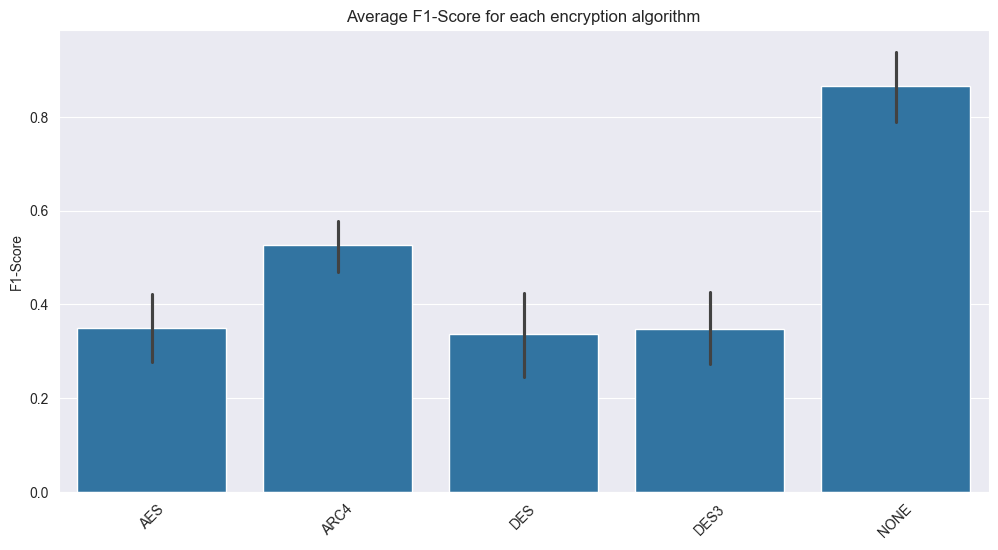

In [15]:
for metric in df_results.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df_results["Model"], df_results[metric], color="dodgerblue", edgecolor="black")
    plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
model_scores = df_class_results.groupby("Model")["F1-Score"].mean().sort_values(ascending=False)

best_model = model_scores.idxmax()
worst_model = model_scores.idxmin()
print(f"Best model: {best_model} with F1-Score = {model_scores.max()}")
print(f"Worst model: {worst_model} with F1-Score = {model_scores.min()}")

plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("F1-Score distribution for different models")
plt.ylabel("F1-Score")
plt.show()

class_scores = df_class_results.groupby("Class")["F1-Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=encoder.classes_[df_class_results["Class"]], y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("Average F1-Score for each encryption algorithm")
plt.ylabel("F1-Score")
plt.show()

In [17]:
df_class_results_3keys = pd.read_csv('training_1800_ecb/df_class_results_1800_ecb_3keys.csv')
df_class_results_3keys

,0,RandomForest,0.1,0.584245,0.606818,0.595318
0,1,RandomForest,1,0.593090,0.796392,0.679868
1,2,RandomForest,2,0.742382,0.623256,0.677623
2,3,RandomForest,3,0.695418,0.570796,0.626974
3,4,RandomForest,4,1.000000,1.000000,1.000000
4,5,RandomForest,0,0.550495,0.661905,0.601081
...,...,...,...,...,...,...
144,145,AdaBoost,0,0.500000,0.008772,0.017241
145,146,AdaBoost,1,0.336086,0.902439,0.489771
146,147,AdaBoost,2,0.438202,0.180556,0.255738
147,148,AdaBoost,3,0.276657,0.237037,0.255319


In [18]:
encoder = LabelEncoder()
df_all_6keys['algorithm'] = encoder.fit_transform(df_all_6keys['algorithm'])
print(encoder.classes_)

X = df_all_6keys.drop(columns=["algorithm", "file_name", "format"])
y = df_all_6keys["algorithm"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_list = []
class_results = {model_name: [] for model_name in models}

for model_name, model in models.items():
    acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
    log_losses, auc_scores = [], []

    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]  # dla pandas.DataFrame
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        if y_pred_proba is not None:
            log_losses.append(log_loss(y_test, y_pred_proba))
            auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))
        else:
            log_losses.append(None)
            auc_scores.append(None)

        class_precision = precision_score(y_test, y_pred, average=None)
        class_recall = recall_score(y_test, y_pred, average=None)
        class_f1 = f1_score(y_test, y_pred, average=None)

        for i, class_label in enumerate(np.unique(y)):
            class_results[model_name].append({
                "Class": class_label,
                "Precision": class_precision[i],
                "Recall": class_recall[i],
                "F1-Score": class_f1[i]
            })

    results_list.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_scores),
        "Accuracy Std": np.std(acc_scores),
        "Precision Mean": np.mean(precision_scores),
        "Precision Std": np.std(precision_scores),
        "Recall Mean": np.mean(recall_scores),
        "Recall Std": np.std(recall_scores),
        "F1-Score Mean": np.mean(f1_scores),
        "F1-Score Std": np.std(f1_scores),
        "Log Loss Mean": np.mean([x for x in log_losses if x is not None]) if any(log_losses) else None,
        "AUC Mean": np.mean([x for x in auc_scores if x is not None]) if any(auc_scores) else None
    })

df_results = pd.DataFrame(results_list)
df_class_results = pd.DataFrame([
    {"Model": model, **result} for model, results in class_results.items() for result in results
])

df_results.style.format("{:.4f}"), df_class_results.style.format("{:.4f}")

['AES' 'ARC4' 'DES' 'DES3' 'NONE']


(<pandas.io.formats.style.Styler at 0x142f34df0>,
 <pandas.io.formats.style.Styler at 0x137d009a0>)

In [19]:
df_results

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std,Log Loss Mean,AUC Mean
0,RandomForest,0.683148,0.009308,0.691346,0.009400,0.683148,0.009308,0.682738,0.009677,0.820565,0.904153
1,SVM,0.401019,0.010835,0.421920,0.006240,0.401019,0.010835,0.354364,0.007749,1.207006,0.734196
2,NaiveBayes,0.268704,0.011274,0.273959,0.007675,0.268704,0.011274,0.208339,0.012447,25.324565,0.583177
3,KNN,0.517407,0.014524,0.533314,0.015581,0.517407,0.014524,0.511539,0.014730,7.068212,0.771769
4,Bagging,0.679259,0.005032,0.688245,0.007056,0.679259,0.005032,0.679119,0.005132,0.729345,0.911401
5,AdaBoost,0.465556,0.019940,0.563345,0.018224,0.465556,0.019940,0.423730,0.018757,1.584984,0.765226


In [8]:
import pandas as pd
import io

csv_data = """
RandomForest,0.683148,0.009308,0.691346,0.009400,0.683148,0.009308,0.682738,0.009677,0.820565,0.904153
SVM,0.401019,0.010835,0.421920,0.006240,0.401019,0.010835,0.354364,0.007749,1.207006,0.734196
NaiveBayes,0.268704,0.011274,0.273959,0.007675,0.268704,0.011274,0.208339,0.012447,25.324565,0.583177
KNN,0.517407,0.014524,0.533314,0.015581,0.517407,0.014524,0.511539,0.014730,7.068212,0.771769
Bagging,0.679259,0.005032,0.688245,0.007056,0.679259,0.005032,0.679119,0.005132,0.729345,0.911401
AdaBoost,0.465556,0.019940,0.563345,0.018224,0.465556,0.019940,0.423730,0.018757,1.584984,0.765226
"""

# Definicje polskich nazw kolumn
column_names = [
    "Model",
    "Średnia dokładność",
    "Odch. std (dokł.)",
    "Średnia precyzja",
    "Odch. std (prec.)",
    "Średnia czułość",
    "Odch. std (czuł.)",
    "Średni F1 Score",
    "Odch. std (F1)",
    "Średnia strata log.",
    "Średni AUC"
]

# Wczytanie danych CSV do DataFrame
# Używamy io.StringIO, aby traktować string csv_data jak plik
df = pd.read_csv(io.StringIO(csv_data), header=None)

# Przypisanie polskich nazw kolumn
df.columns = column_names

# Wyświetlenie DataFrame
df

,Model,Średnia dokładność,Odch. std (dokł.),Średnia precyzja,Odch. std (prec.),Średnia czułość,Odch. std (czuł.),Średni F1 Score,Odch. std (F1),Średnia strata log.,Średni AUC
0,RandomForest,0.683148,0.009308,0.691346,0.009400,0.683148,0.009308,0.682738,0.009677,0.820565,0.904153
1,SVM,0.401019,0.010835,0.421920,0.006240,0.401019,0.010835,0.354364,0.007749,1.207006,0.734196
2,NaiveBayes,0.268704,0.011274,0.273959,0.007675,0.268704,0.011274,0.208339,0.012447,25.324565,0.583177
3,KNN,0.517407,0.014524,0.533314,0.015581,0.517407,0.014524,0.511539,0.014730,7.068212,0.771769
4,Bagging,0.679259,0.005032,0.688245,0.007056,0.679259,0.005032,0.679119,0.005132,0.729345,0.911401
5,AdaBoost,0.465556,0.019940,0.563345,0.018224,0.465556,0.019940,0.423730,0.018757,1.584984,0.765226


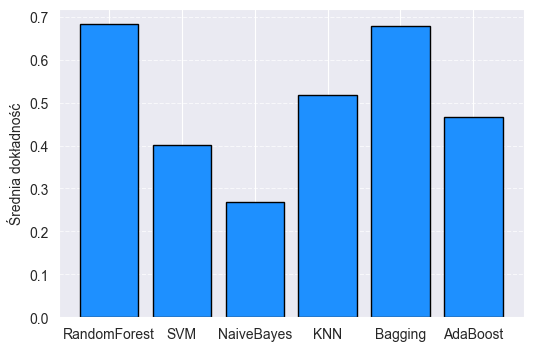

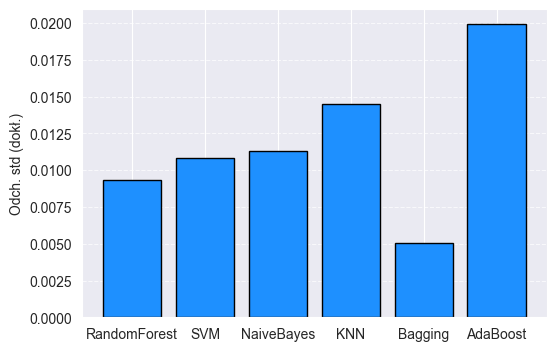

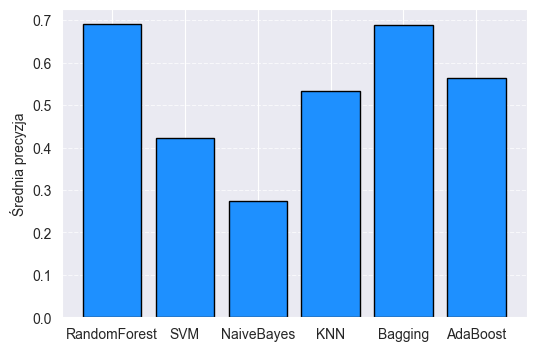

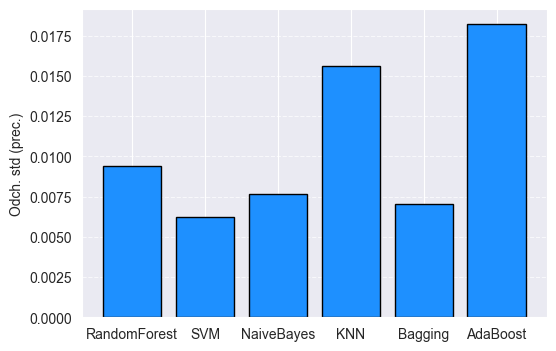

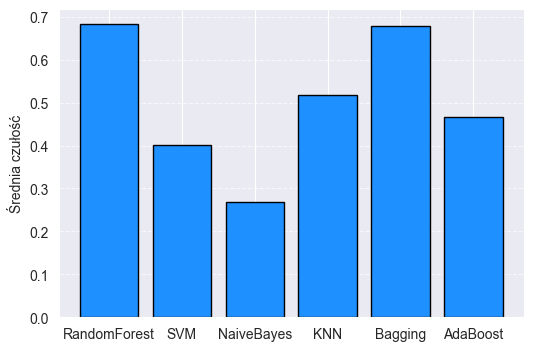

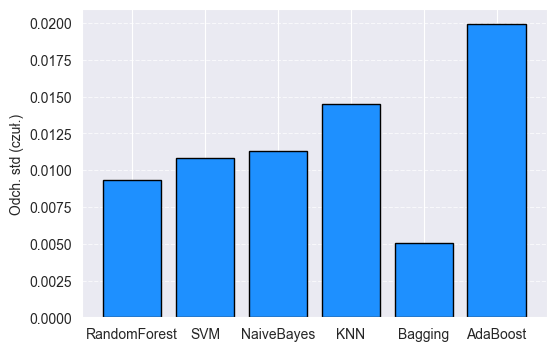

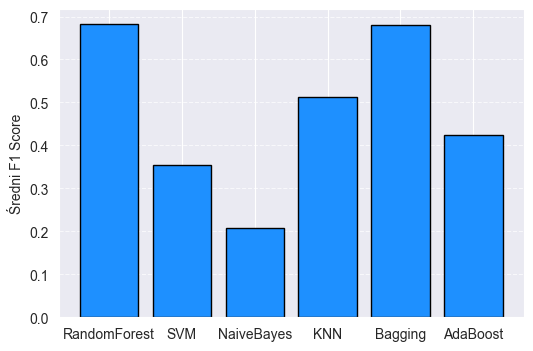

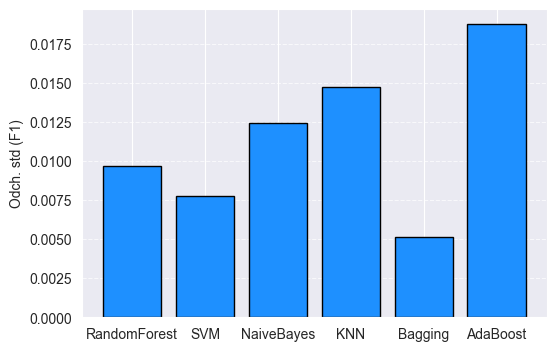

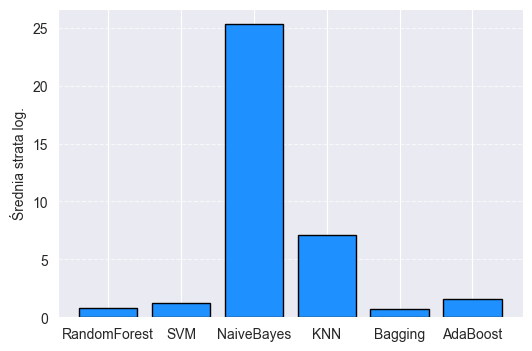

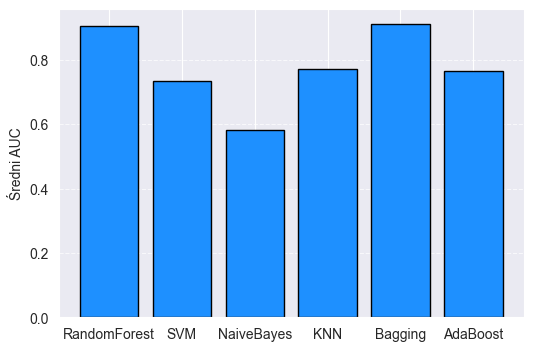

In [9]:
import matplotlib.pyplot as plt

for metric in df.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df["Model"], df[metric], color="dodgerblue", edgecolor="black")
    #plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

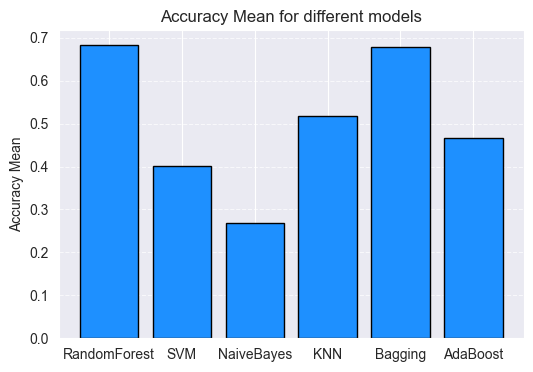

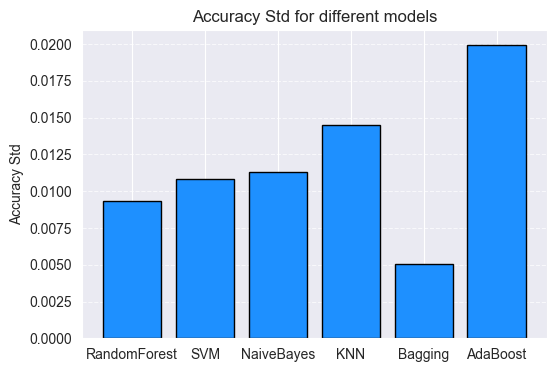

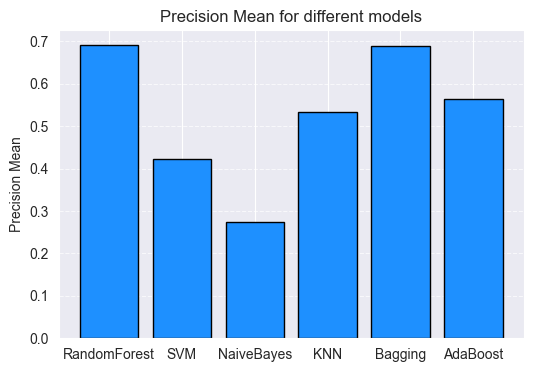

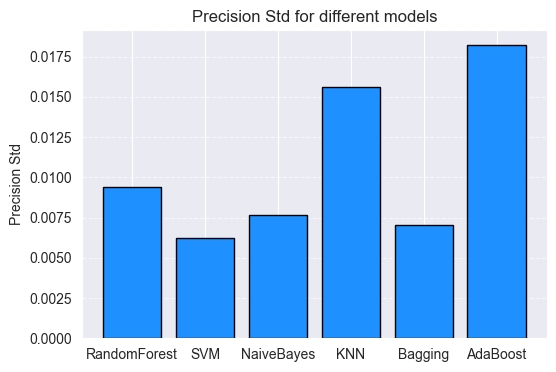

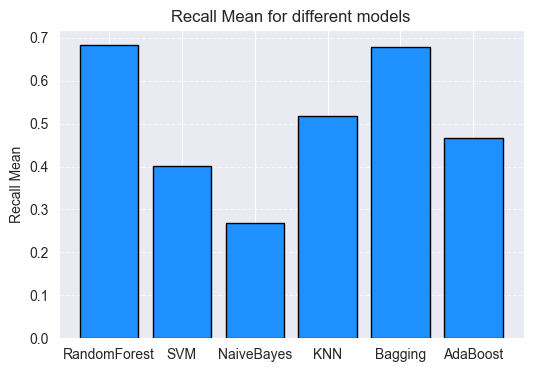

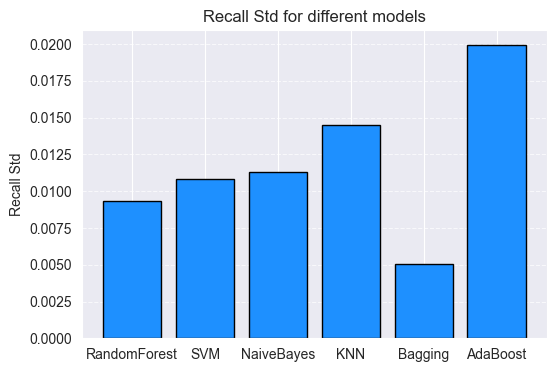

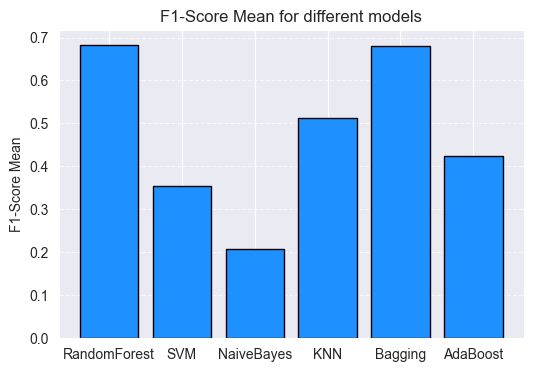

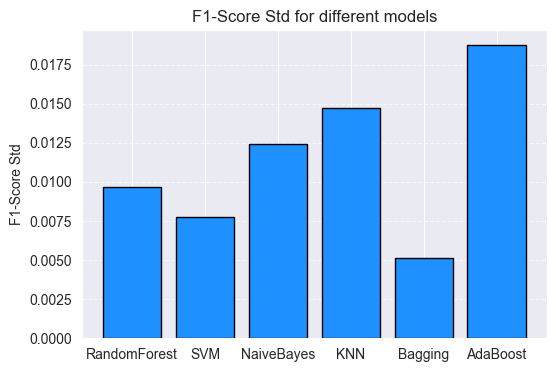

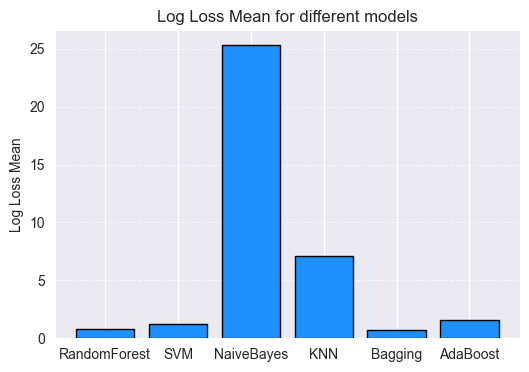

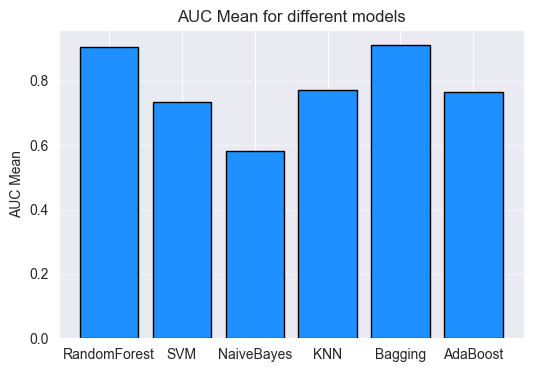

Best model: RandomForest with F1-Score = 0.682458021176868
Worst model: NaiveBayes with F1-Score = 0.2082026336791838


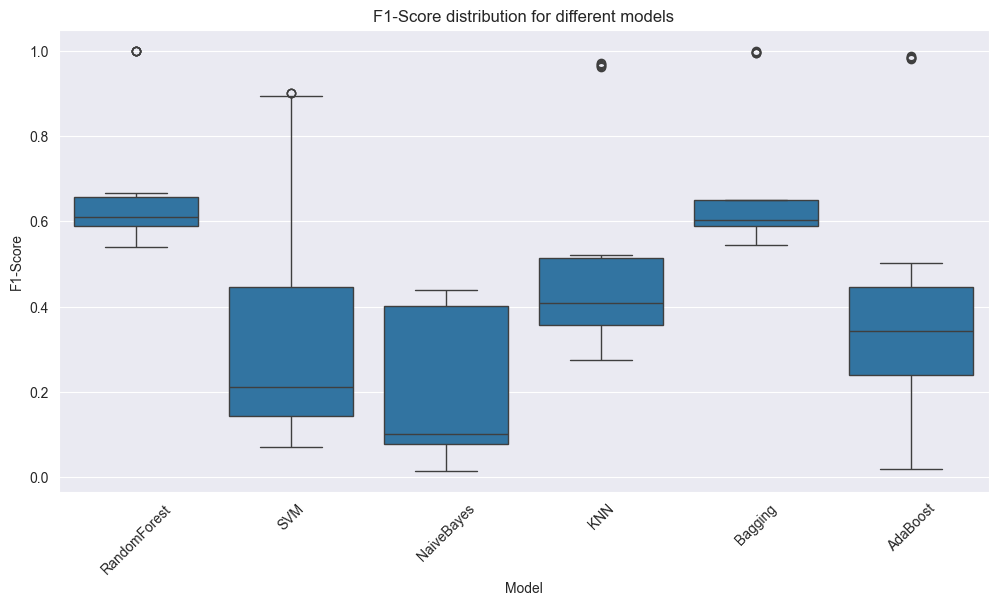

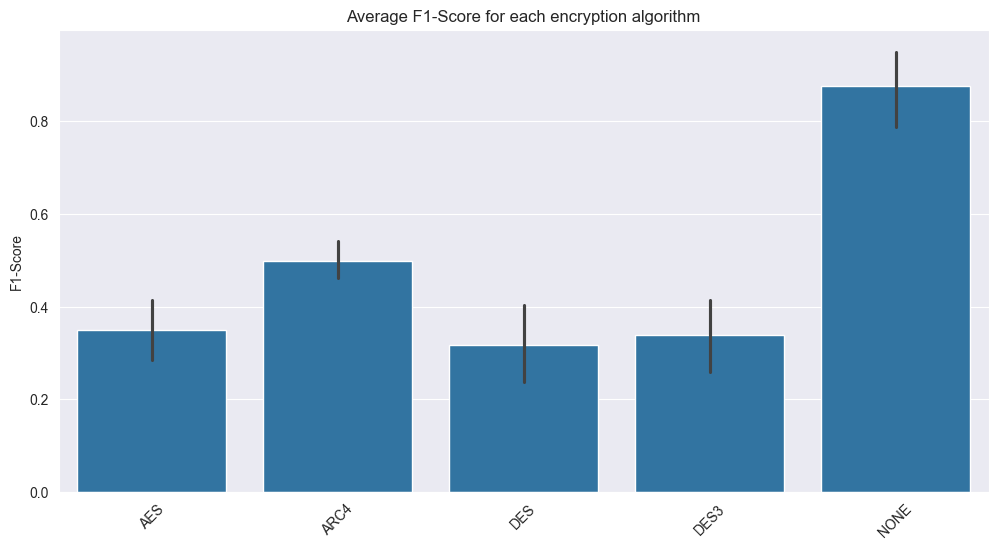

In [20]:
for metric in df_results.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df_results["Model"], df_results[metric], color="dodgerblue", edgecolor="black")
    plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
model_scores = df_class_results.groupby("Model")["F1-Score"].mean().sort_values(ascending=False)

best_model = model_scores.idxmax()
worst_model = model_scores.idxmin()
print(f"Best model: {best_model} with F1-Score = {model_scores.max()}")
print(f"Worst model: {worst_model} with F1-Score = {model_scores.min()}")

plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("F1-Score distribution for different models")
plt.ylabel("F1-Score")
plt.show()

class_scores = df_class_results.groupby("Class")["F1-Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=encoder.classes_[df_class_results["Class"]], y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("Average F1-Score for each encryption algorithm")
plt.ylabel("F1-Score")
plt.show()

In [23]:
df_class_results_6keys = pd.read_csv('training_1800_ecb/df_class_results_1800_ecb_6keys.csv')
df_class_results_6keys

,Unnamed: 0,Model,Class,Precision,Recall,F1-Score
0,0,RandomForest,0,0.541284,0.536364,0.538813
1,1,RandomForest,1,0.513793,0.768041,0.615702
2,2,RandomForest,2,0.706849,0.600000,0.649057
3,3,RandomForest,3,0.711246,0.517699,0.599232
4,4,RandomForest,4,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
145,145,AdaBoost,0,0.776786,0.190789,0.306338
146,146,AdaBoost,1,0.343089,0.935698,0.502082
147,147,AdaBoost,2,0.513889,0.085648,0.146825
148,148,AdaBoost,3,0.379205,0.306173,0.338798
